In [1]:
import pandas as pd

# Load the CSV file with lyrics
df = pd.read_csv("muse_sample_with_lyrics.csv")

# Filter out songs with no lyrics
df = df[df['lyrics'].notna() & (df['lyrics'].str.strip() != "")]

# Example filter: only 'pop' or 'rock' songs with high arousal
# filtered = df[
#     (df['genre'].isin(['pop', 'rock'])) &
#     (df['arousal_tags'].str.lower() == 'high')
# ]

# the og code had filtered.to_csv but I changed it to df cause I don't need to filter genre

# Save filtered result to a new CSV
df.to_csv("muse_filtered_lyrics.csv", index=False)

print(f"✅ Filtered down to {len(df)} songs.")


✅ Filtered down to 10 songs.


In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data (only once)
# import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # <-- add this line


# Load your file
df = pd.read_csv("C:/Users/LENOVO/Desktop/LSRA/code/early_check/muse_sample_with_lyrics.csv")

# Setup NLP tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_lyrics(text):
    if pd.isna(text) or text.strip() == "":
        return ""
    
    text = text.lower()                        # Lowercase
    text = re.sub(r'\n+', ' ', text)           # Remove newlines
    text = re.sub(r'[^a-z\s]', '', text)       # Remove punctuation, numbers
    tokens = nltk.word_tokenize(text)          # Tokenize
    tokens = [t for t in tokens if t not in stop_words]  # Remove stopwords
    lemmatized = [lemmatizer.lemmatize(t) for t in tokens]  # Lemmatize
    return " ".join(lemmatized)

# Apply cleaning function
df['cleaned_lyrics'] = df['lyrics'].apply(clean_lyrics)

# Save to a new file
df.to_csv("muse_sample_cleaned.csv", index=False)
print("✅ Cleaned lyrics saved to muse_sample_cleaned.csv")


[nltk_data] Downloading package punkt to C:\Users\LENOVO/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\LENOVO/nltk_data'
    - 'c:\\Users\\LENOVO\\AppData\\Local\\Programs\\Python\\Python313\\nltk_data'
    - 'c:\\Users\\LENOVO\\AppData\\Local\\Programs\\Python\\Python313\\share\\nltk_data'
    - 'c:\\Users\\LENOVO\\AppData\\Local\\Programs\\Python\\Python313\\lib\\nltk_data'
    - 'C:\\Users\\LENOVO\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [10]:
import nltk
print(nltk.data.path)


['C:\\Users\\LENOVO/nltk_data', 'c:\\Users\\LENOVO\\AppData\\Local\\Programs\\Python\\Python313\\nltk_data', 'c:\\Users\\LENOVO\\AppData\\Local\\Programs\\Python\\Python313\\share\\nltk_data', 'c:\\Users\\LENOVO\\AppData\\Local\\Programs\\Python\\Python313\\lib\\nltk_data', 'C:\\Users\\LENOVO\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [ ]:
import nltk

# Add custom data path if needed
nltk.data.path.append('C:/Users/LENOVO/nltk_data')

# Download required data
nltk.download('punkt', download_dir='C:/Users/LENOVO/nltk_data')
nltk.download('stopwords', download_dir='C:/Users/LENOVO/nltk_data')
nltk.download('wordnet', download_dir='C:/Users/LENOVO/nltk_data')
nltk.download('omw-1.4', download_dir='C:/Users/LENOVO/nltk_data')
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load your file
df = pd.read_csv("muse_sample_with_lyrics.csv")

# Setup NLP tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_lyrics(text):
    if pd.isna(text) or text.strip() == "":
        return ""
    
    text = text.lower()                        # Lowercase
    text = re.sub(r'\n+', ' ', text)           # Remove newlines
    text = re.sub(r'[^a-z\s]', '', text)       # Remove punctuation, numbers
    tokens = nltk.word_tokenize(text)          # Tokenize
    tokens = [t for t in tokens if t not in stop_words]  # Remove stopwords
    # lemmatized = [lemmatizer.lemmatize(t) for t in tokens]  # Lemmatize
    # return " ".join(lemmatized)

# Apply cleaning function
df['cleaned_lyrics'] = df['lyrics'].apply(clean_lyrics)

# Save to a new file
df.to_csv("muse_sample_cleaned.csv", index=False)
print("✅ Cleaned lyrics saved to muse_sample_cleaned.csv")


In [19]:
df.head()

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre,lyrics
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap,"'Cause sometimes you just feel tired, feel wea..."
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal,St. Anger 'round my neck\nSt. Anger 'round my ...
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap,Legendary\nRunners\nYou know me\n\nTrilla\n\nE...
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop,"Road runner, road runner\nGoing hundred miles ..."
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal,I don't need your forgiveness\nI don't need yo...


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# Download required NLTK data (only once)
# import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # <-- add this line


# Load your file
df = pd.read_csv("C:/Users/LENOVO/Desktop/LSRA/code/early_check/muse_sample_with_lyrics.csv")

# Setup NLP tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

df['lyrics'] = df['lyrics'].astype(str)

def clean_lyrics(text):
    if pd.isna(text) or text.strip() == "":
        return ""
    
    text = text.lower()                        # Lowercase
    text = re.sub(r'\n+', ' ', text)           # Remove newlines
    text = re.sub(r'[^a-z\s]', '', text)       # Remove punctuation, numbers
    tokens = word_tokenize(text)          # Tokenize
    tokens = [t for t in tokens if t not in stop_words]  # Remove stopwords
    # lemmatized = [lemmatizer.lemmatize(t) for t in tokens]  # Lemmatize
    # return " ".join(lemmatized)

# Apply cleaning function
df['cleaned_lyrics'] = df['lyrics'].apply(clean_lyrics)

# Save to a new file
df.to_csv("muse_sample_cleaned.csv", index=False)
print("✅ Cleaned lyrics saved to muse_sample_cleaned.csv")


In [21]:
df['lyrics']

0    'Cause sometimes you just feel tired, feel wea...
1    St. Anger 'round my neck\nSt. Anger 'round my ...
2    Legendary\nRunners\nYou know me\n\nTrilla\n\nE...
3    Road runner, road runner\nGoing hundred miles ...
4    I don't need your forgiveness\nI don't need yo...
5    One, two, three, go\n\nBroken\nYeah you been l...
6    Ayy, y'all heard about the good news?\nY'all s...
7    I'll never be the same, breaking decency\nDon'...
8    You wanna make me sick\nYou wanna lick my woun...
9    Watch your back, so you won't stab mine\nGet i...
Name: lyrics, dtype: object

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data (only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load your file
df = pd.read_csv("C:/Users/LENOVO/Desktop/LSRA/code/early_check/muse_sample_with_lyrics.csv")

# Setup NLP tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_lyrics(text):
    if pd.isna(text) or text.strip() == "":
        return ""
    
    text = text.lower()                        # Lowercase
    text = re.sub(r'\n+', ' ', text)           # Remove newlines
    text = re.sub(r'[^a-z\s]', '', text)       # Remove punctuation, numbers
    tokens = nltk.word_tokenize(text)          # Tokenize
    tokens = [t for t in tokens if t not in stop_words]  # Remove stopwords
    lemmatized = [lemmatizer.lemmatize(t) for t in tokens]  # Lemmatize
    return " ".join(lemmatized) 

# Apply cleaning function
df['cleaned_lyrics'] = df['lyrics'].apply(clean_lyrics)

# Save to a new file
df.to_csv("muse_sample_cleaned.csv", index=False)
print("✅ Cleaned lyrics saved to muse_sample_cleaned.csv")

In [ ]:
import pandas as pd
import re
import nltk
import os
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# ==============================================
# NLTK SETUP - BULLETPROOF VERSION
# ==============================================

# Set custom NLTK data directory path
NLTK_DATA_DIR = os.path.join(os.path.expanduser('~'), 'nltk_data_custom')

# Create directory if it doesn't exist
os.makedirs(NLTK_DATA_DIR, exist_ok=True)

# Set NLTK to use our custom directory
nltk.data.path.append(NLTK_DATA_DIR)

# List of required NLTK resources
required_nltk = [
    ('corpora/stopwords', 'stopwords'),
    ('tokenizers/punkt', 'punkt'),
    ('corpora/wordnet', 'wordnet'),
    ('corpora/omw-1.4', 'omw-1.4')
]

# Download with verification
for subdir, package in required_nltk:
    try:
        # Check if already downloaded
        nltk.data.find(f'{subdir}')
        print(f"✓ {package} already available")
    except LookupError:
        print(f"⚠ {package} not found - downloading...")
        try:
            nltk.download(package, download_dir=NLTK_DATA_DIR)
            # Verify download succeeded
            nltk.data.find(f'{subdir}')
            print(f"✓ {package} successfully downloaded")
        except Exception as e:
            print(f"❌ Failed to download {package}: {str(e)}")
            raise

# ==============================================
# LYRIC PROCESSING
# ==============================================

# Initialize NLP tools
try:
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    print("✓ NLP tools initialized successfully")
except Exception as e:
    print(f"❌ Failed to initialize NLP tools: {str(e)}")
    raise

def clean_lyrics(text):
    """Robust lyrics cleaning function with error handling"""
    try:
        # Handle missing/empty text
        if pd.isna(text) or not isinstance(text, str) or text.strip() == "":
            return ""
        
        # Processing pipeline
        text = text.lower()                        # Lowercase
        text = re.sub(r'\n+', ' ', text)           # Remove newlines
        text = re.sub(r'[^a-z\s]', '', text)       # Remove punctuation/numbers
        text = ' '.join(text.split())              # Normalize whitespace
        
        # Tokenization with fallback
        try:
            tokens = nltk.word_tokenize(text)
        except:
            tokens = text.split()  # Fallback to simple whitespace splitting
        
        # Remove stopwords and lemmatize
        tokens = [t for t in tokens if t not in stop_words]
        tokens = [lemmatizer.lemmatize(t) for t in tokens]
        
        return ' '.join(tokens)
    
    except Exception as e:
        print(f"⚠ Error processing text (returning empty string): {str(e)}")
        return ""

# ==============================================
# DATA PROCESSING
# ==============================================

try:
    # Load data with encoding fallbacks
    try:
        df = pd.read_csv("C:/Users/LENOVO/Desktop/LSRA/code/early_check/muse_sample_with_lyrics.csv")
    except UnicodeDecodeError:
        df = pd.read_csv("C:/Users/LENOVO/Desktop/LSRA/code/early_check/muse_sample_with_lyrics.csv", 
                        encoding='latin1')
    
    print("✓ Data loaded successfully")
    
    # Process lyrics with progress feedback
    print("Starting lyrics cleaning...")
    df['cleaned_lyrics'] = df['lyrics'].progress_apply(clean_lyrics)  # Requires tqdm
    
    # Save output
    output_path = "C:/Users/LENOVO/Desktop/LSRA/code/early_check/muse_sample_cleaned.csv"
    df.to_csv(output_path, index=False)
    print(f"✓ Cleaned lyrics saved to {output_path}")
    
except Exception as e:
    print(f"❌ Fatal error in data processing: {str(e)}")
    raise

In [ ]:
import pandas as pd
import re
import os
from pathlib import Path
from bs4 import BeautifulSoup
import requests
import zipfile
import shutil

# ==============================================
# MANUAL NLTK DATA INSTALLATION
# ==============================================

def manual_nltk_setup():
    """Bypass NLTK downloader by manually installing required data"""
    nltk_data_dir = Path.home() / 'nltk_data_custom'
    nltk_data_dir.mkdir(exist_ok=True)
    
    # Required packages with their download URLs
    packages = {
        'stopwords': 'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/stopwords.zip',
        'punkt': 'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/tokenizers/punkt.zip',
        'wordnet': 'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/wordnet.zip',
        'omw': 'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/omw-1.4.zip'
    }
    
    for name, url in packages.items():
        target_dir = nltk_data_dir / name
        if not target_dir.exists():
            print(f"Downloading {name}...")
            try:
                # Download the zip file
                response = requests.get(url, stream=True)
                zip_path = nltk_data_dir / f'{name}.zip'
                with open(zip_path, 'wb') as f:
                    shutil.copyfileobj(response.raw, f)
                
                # Extract and organize files
                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    zip_ref.extractall(nltk_data_dir)
                
                # Clean up
                os.remove(zip_path)
                print(f"✓ {name} installed successfully")
            except Exception as e:
                print(f"❌ Failed to install {name}: {str(e)}")
                continue
        else:
            print(f"✓ {name} already exists")

# Run the manual setup
manual_nltk_setup()

# ==============================================
# ALTERNATIVE NLP PROCESSING
# ==============================================

# Use spaCy as a more reliable alternative
try:
    import spacy
    print("Loading spaCy English model...")
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    print("✓ spaCy model loaded successfully")
except ImportError:
    print("Installing spaCy...")
    !pip install spacy
    !python -m spacy download en_core_web_sm
    import spacy
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def clean_text(text):
    """Robust text cleaning using spaCy"""
    if pd.isna(text) or not isinstance(text, str) or text.strip() == "":
        return ""
    
    # Basic cleaning
    text = text.lower()
    text = re.sub(r'\n+', ' ', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join(text.split())
    
    # Process with spaCy
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc 
        if not token.is_stop and not token.is_punct and token.is_alpha
    ]
    return ' '.join(tokens)

# ==============================================
# DATA PROCESSING
# ==============================================

try:
    # Load data with multiple encoding attempts
    encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
    for encoding in encodings:
        try:
            df = pd.read_csv(
                "C:/Users/LENOVO/Desktop/LSRA/code/early_check/muse_sample_with_lyrics.csv",
                encoding=encoding
            )
            print(f"✓ Data loaded with {encoding} encoding")
            break
        except UnicodeDecodeError:
            continue
    
    # Process lyrics
    print("Cleaning lyrics...")
    df['cleaned_lyrics'] = df['lyrics'].apply(clean_text)
    
    # Save results
    output_path = "C:/Users/LENOVO/Desktop/LSRA/code/early_check/muse_sample_cleaned.csv"
    df.to_csv(output_path, index=False)
    print(f"✓ Cleaned data saved to {output_path}")
    
except Exception as e:
    print(f"❌ Processing failed: {str(e)}")
    raise

✓ stopwords installed successfully
✓ punkt installed successfully
✓ wordnet installed successfully
✓ omw installed successfully
Installing spaCy...
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.8/13.9 MB 11.3 MB/s eta 0:00:02
   -------------- ------------------------- 5.0/13.9 MB 13.3 MB/s eta 0:00:01
   ---------------------- ----------------- 7.9/13.9 MB 13.8 MB/s eta 0:00:01
   ------------------------------- -------- 11.0/13.9 MB 14.1 MB/s eta 0:00:01
   ---------------------------------------  13.9/13.9 MB 14.2 MB/s eta 0:00:01
   ---------------------------------------- 13.9/13.9 MB 13.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ------------------------------------- -- 1.8/2.0 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 8.2 MB/s eta 0:00:00
   -------------------

In [14]:
clean=pd.read_csv('C:/Users/LENOVO/Desktop/LSRA/code/early_check/muse_sample_cleaned.csv')
clean[['cleaned_lyrics']].head()


,cleaned_lyrics
0,cause feel tired feel weak feel weak feel like...
1,st anger round neck st anger round neck get re...
2,legendary runner know trilla dollar count not ...
3,road runner road runner go mile hour road runn...
4,not need forgiveness not need hate not need ac...


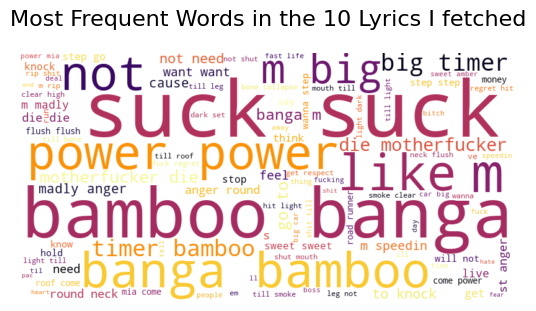

Word cloud saved to lyrics_wordcloud.png


In [19]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your cleaned lyrics CSV
df = pd.read_csv("muse_sample_cleaned.csv")  # Use your output file

# Combine all lyrics into one giant string
all_lyrics = " ".join(lyric for lyric in df['cleaned_lyrics'].astype(str))

# Customize your word cloud
wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',  # Background color
    colormap='inferno',        # Color theme (try 'plasma', 'magma', 'inferno')
    max_words=100,             # Limit number of words
    stopwords={'oh', 'yeah'},  # Add extra stopwords
    contour_width=1,           # Add borders
    contour_color='steelblue'  # Border color
).generate(all_lyrics)

# Display the word cloud
# plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Remove axes
plt.title("Most Frequent Words in the 10 Lyrics I fetched", fontsize=16, pad=20)
plt.show()

# Save to file
wordcloud.to_file("lyrics_wordcloud.png")
print("Word cloud saved to lyrics_wordcloud.png")